In [63]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### There are multple files that contain the overarching data as heuristics of the bouts under analyis.

In [31]:
exercise_overview_path = '/Users/daviddiaz/Desktop/Main/Heart-Rate-Monitoring-Forecast/watch_data/com.samsung.health.exercise.2024110708.csv'

exercise_overview = pd.read_csv(exercise_overview_path, index_col=False)

hr_overview_path = '/Users/daviddiaz/Desktop/Main/Heart-Rate-Monitoring-Forecast/watch_data/com.samsung.health.heart_rate.2024110708.csv'

hr_overview = pd.read_csv(hr_overview_path, index_col=False)

step_count_path = '/Users/daviddiaz/Desktop/Main/Heart-Rate-Monitoring-Forecast/watch_data/com.samsung.health.step_count.2024110708.csv'

step_count = pd.read_csv(step_count_path, index_col=False)

### Bouts of heart rate measurement

In [76]:
# Convert Start time to datetime
hr_overview['start_time'] = pd.to_datetime(hr_overview['start_time'], format='%m/%d/%Y, %I:%M:%S %p')
hr_overview['end_time'] = pd.to_datetime(hr_overview['end_time'], format='%m/%d/%Y, %I:%M:%S %p')
# Make a new column and place the date 
hr_overview['date'] = hr_overview['start_time'].dt.date

In [143]:
hr_df = hr_overview[['datauuid','create_time','start_time', 'end_time', 'date', 'heart_rate', 'min','max']].copy()

In [46]:
hr_df = hr_df.sort_values(by='create_time')

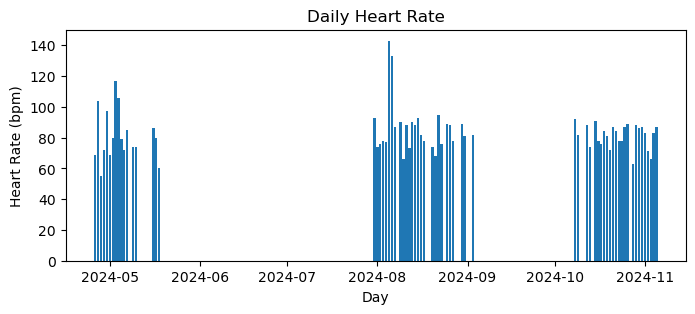

In [75]:
# Initialize Variables
date_x = hr_df['date']
hr = hr_df['heart_rate']

# Create the figure
plt.figure(figsize=(8, 3))
# Plot the variables
plt.bar(date_x, hr)
plt.title('Daily Heart Rate')
plt.xlabel('Day')
plt.ylabel('Heart Rate (bpm)')
plt.show()

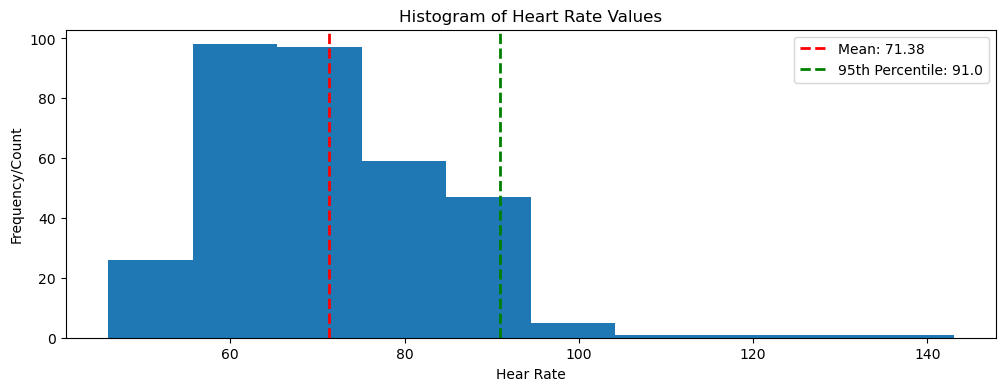

In [70]:
# Find the 95th percentile
percentile_95 = np.percentile(hr, 95)

# Create the figure
plt.figure(figsize=(12,4))
plt.hist(hr, bins=10)
plt.axvline(x=hr.mean(), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {hr.mean():.2f}')
plt.axvline(x=percentile_95, color='green', linestyle='dashed', linewidth=2, label=f'95th Percentile: {percentile_95}')
plt.title('Histogram of Heart Rate Values')
plt.xlabel('Hear Rate')
plt.ylabel('Frequency/Count')
plt.legend()
plt.show()

### Exercise Analysis

In [79]:
exercise_overview.columns

Index(['count_type', 'create_sh_ver', 'modify_sh_ver', 'time_offset',
       'decline_distance', 'update_time', 'end_time', 'additional', 'max_rpm',
       'pkg_name', 'mean_cadence', 'custom', 'duration', 'sweat_loss',
       'comment', 'mean_power', 'location_data', 'mean_caloricburn_rate',
       'create_time', 'altitude_loss', 'mean_rpm', 'distance', 'max_power',
       'count', 'max_cadence', 'altitude_gain', 'max_altitude',
       'exercise_custom_type', 'vo2_max', 'datauuid', 'max_caloricburn_rate',
       'max_heart_rate', 'max_speed', 'mean_speed', 'start_time', 'calorie',
       'mean_heart_rate', 'live_data', 'min_heart_rate', 'min_altitude',
       'incline_distance', 'auxiliary_devices', 'deviceuuid', 'exercise_type'],
      dtype='object')

In [89]:
exercise_df = exercise_overview[['datauuid', 'start_time', 'end_time', 'duration', 'mean_heart_rate', 'min_heart_rate', 'max_heart_rate', 'calorie', 'mean_speed', 'max_speed', 'exercise_type']].copy()

In [103]:
exercise_df['start_time'] = pd.to_datetime(exercise_df['start_time'], format='%m/%d/%Y, %I:%M:%S %p')
exercise_df['end_time'] = pd.to_datetime(exercise_df['end_time'], format='%m/%d/%Y, %I:%M:%S %p')

exercise_df['date'] = exercise_df['start_time'].dt.date

# Generate a new duration as the currnet is an int of miliseconds
exercise_df['new_duration'] = (exercise_df['end_time'] - exercise_df['start_time']).dt.total_seconds() / 60

exercise_df = exercise_df.sort_values(by='start_time')

In [104]:
exercise_df

,datauuid,start_time,end_time,duration,mean_heart_rate,min_heart_rate,max_heart_rate,calorie,mean_speed,max_speed,exercise_type,new_duration,date
0,04ddf549-cbc9-351f-9b1a-51511470d787,2024-04-26 13:54:25,2024-04-26 14:09:18,892524,93.0,87.0,106.0,74.0,1.465623,2.277778,1001,14.883333,2024-04-26
1,b3ccd525-0f82-7fba-26d7-adf73ca28653,2024-04-26 16:55:57,2024-04-26 17:23:55,1678069,101.0,76.0,123.0,129.0,1.321615,1.632821,1001,27.966667,2024-04-26
2,bc0b0c14-f135-35f7-2601-4f09f3245ede,2024-04-26 17:46:52,2024-04-26 18:09:34,1362498,103.0,75.0,130.0,104.0,1.282309,1.558825,1001,22.700000,2024-04-26
3,3d5f56af-cbe4-a971-1693-0e60ab8d17d7,2024-04-27 05:02:32,2024-04-27 06:33:30,5457954,134.0,86.0,161.0,940.0,2.399807,2.655528,1002,90.966667,2024-04-27
4,ac3f23d2-1cac-a929-49a6-53d1ea9aeb02,2024-04-27 13:43:41,2024-04-27 13:56:00,739164,95.0,72.0,113.0,57.0,1.411960,1.745525,1001,12.316667,2024-04-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,a5875b2a-e5d0-ea71-7ca3-dc46742d5989,2024-11-02 12:07:37,2024-11-02 12:21:42,845078,104.0,95.0,117.0,69.0,1.417730,1.583333,1001,14.083333,2024-11-02
84,bfa737cb-b1d2-b903-ea06-4753990ebf2e,2024-11-03 10:39:15,2024-11-03 11:21:15,2519495,113.0,101.0,131.0,213.0,1.416415,1.570658,1001,42.000000,2024-11-03
85,ac9cf0d3-ba7c-5314-3233-e9f9bea233c1,2024-11-04 09:57:56,2024-11-04 10:40:35,2558345,83.0,57.0,102.0,213.0,1.426104,1.603064,1001,42.650000,2024-11-04
86,bef04fbd-1e76-7d72-f837-f286e792d2b2,2024-11-06 12:31:28,2024-11-06 13:03:57,1949329,97.0,77.0,149.0,167.0,1.417528,2.451668,1001,32.483333,2024-11-06


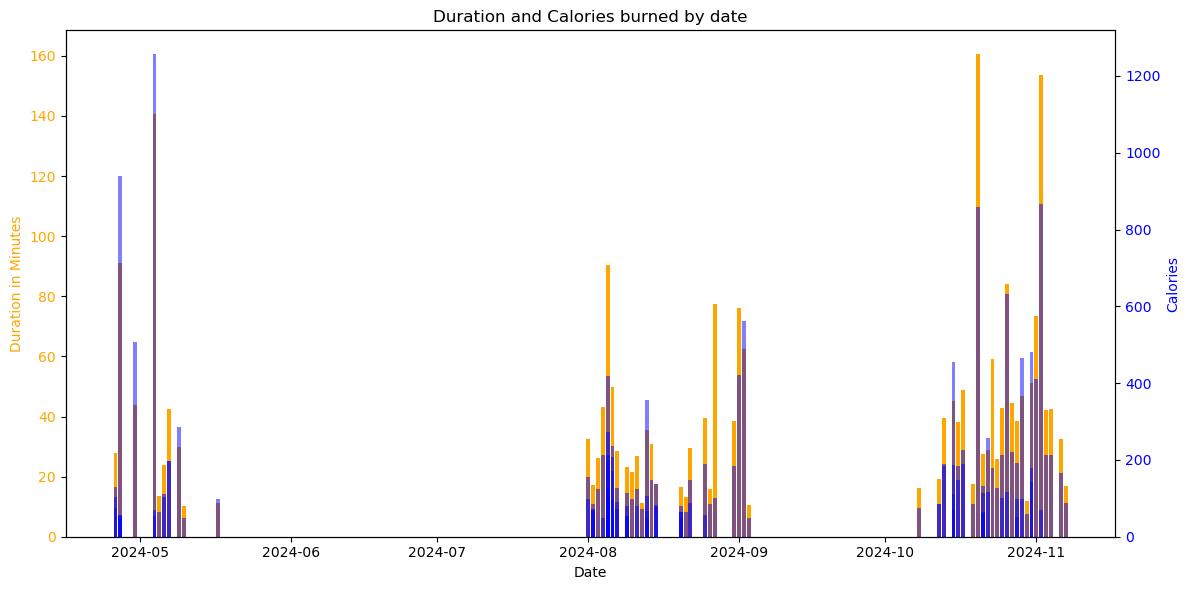

In [123]:
# Initilize Variables
x2 = exercise_df['date']
y2 = exercise_df['new_duration']
x2_calories = exercise_df['calorie']

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first bar (Duration in Minutes)
ax1.bar(x2, y2, color='orange', label='Duration in Minutes')
ax1.set_xlabel('Date')
ax1.set_ylabel('Duration in Minutes', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

# Create a second y-axis for the Calories bar
ax2 = ax1.twinx()
ax2.bar(x2, x2_calories, color='blue', label='Calories', alpha=0.5)
ax2.set_ylabel('Calories', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
plt.title('Duration and Calories burned by date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### A big issue here is that all these bouts of exercise include hikes, runs, and walks. All are very frequent. Will have to use external data from MapMyRun, AllTrails, and Polar to differentiate. Walks will be the toughest to categorize.

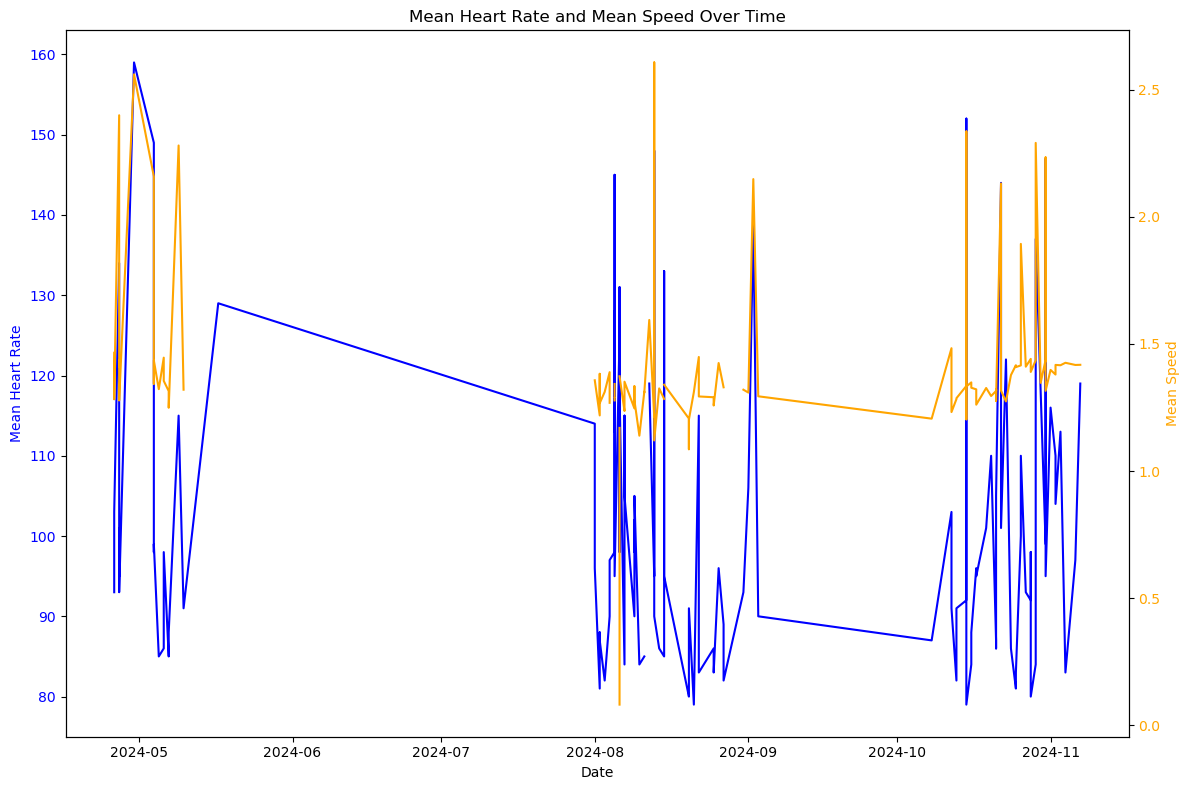

In [111]:
# Initialize Variables
x2_hr = exercise_df['mean_heart_rate']
x2_speed = exercise_df['mean_speed']

fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the mean heart rate on the first axes
ax1.plot(x2, x2_hr, color='blue', label='Mean Heart Rate')
ax1.set_xlabel('Date')
ax1.set_ylabel('Mean Heart Rate', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second axes that shares the same x-axis
ax2 = ax1.twinx()
ax2.plot(x2, x2_speed, color='orange', label='Mean Speed')
ax2.set_ylabel('Mean Speed', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
plt.title('Mean Heart Rate and Mean Speed Over Time')
plt.xticks(rotation=45)
# Show the plot
plt.tight_layout()
plt.show()

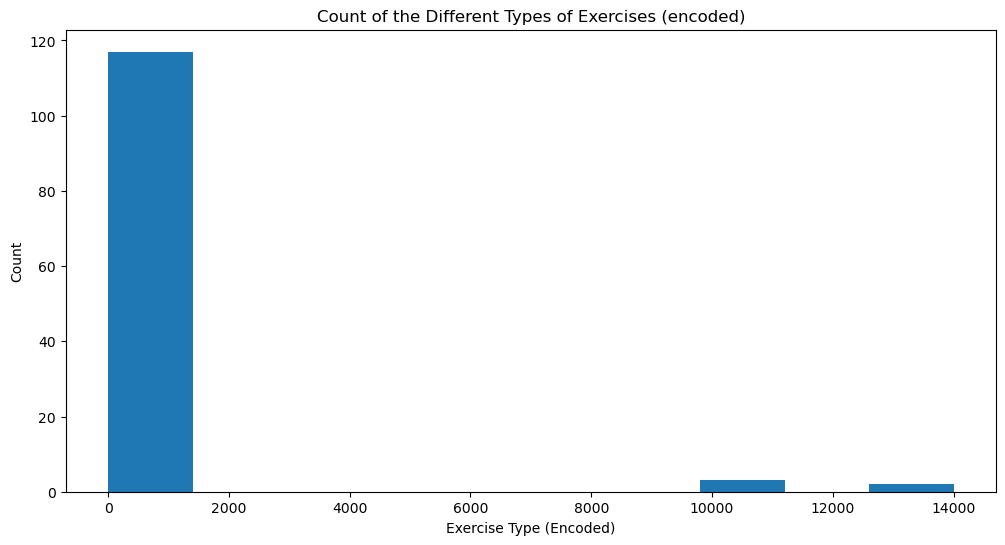

In [128]:
# Histogram of the Exercise type
plt.figure(figsize=(12,6))
plt.hist(exercise_df['exercise_type'])
plt.title('Count of the Different Types of Exercises (encoded)')
plt.xlabel('Exercise Type (Encoded)')
plt.ylabel('Count')
plt.show()

#### Need to find the mapping of Exercise Type or can differentiate through further analysis of the groups. Can also do some statistical analyis on the different groups

### Step Count Analysis

In [131]:
step_count['start_time'] = pd.to_datetime(step_count['start_time'], format='%m/%d/%Y, %I:%M:%S %p')
step_count['end_time'] = pd.to_datetime(step_count['end_time'], format='%m/%d/%Y, %I:%M:%S %p')

step_count['date'] = step_count['start_time'].dt.date

step_count['new_duration'] = (step_count['end_time'] - step_count['start_time']).dt.total_seconds() / 60

step_count = step_count.sort_values(by='start_time')


In [133]:
step_count_df = step_count[['datauuid', 'start_time', 'end_time', 'date', 'new_duration', 'distance', 'calorie', 'count']].copy()

In [134]:
step_count_df

,datauuid,start_time,end_time,date,new_duration,distance,calorie,count
0,1fad79a3-6f94-1ad7-adbe-ad0000eb3b56,2024-04-26 10:03:00,2024-04-26 10:03:59,2024-04-26,0.983333,8.190000,0.300000,10
1,fdc6f334-9534-99af-f9bc-6a28e7d9f1a9,2024-04-26 10:06:00,2024-04-26 10:06:59,2024-04-26,0.983333,45.350000,2.080000,60
2,6a8bcfbd-fd51-acee-feff-774409fee3ce,2024-04-26 10:07:00,2024-04-26 10:07:59,2024-04-26,0.983333,14.260000,0.700000,19
3,ef845aac-ab33-f0d6-5a41-26ef4b505b76,2024-04-26 10:08:00,2024-04-26 10:08:59,2024-04-26,0.983333,13.370000,0.680000,19
4,3162d250-57e3-28c0-05b8-838d8ff09045,2024-04-26 10:11:00,2024-04-26 10:11:59,2024-04-26,0.983333,16.070000,0.730000,21
...,...,...,...,...,...,...,...,...
22607,e3b2c2d6-28a2-d08f-e9e0-b339dcbea643,2024-11-07 08:29:00,2024-11-07 08:29:59,2024-11-07,0.983333,11.300000,0.550000,15
22608,a31d1bc2-8fb3-f59d-a5b2-53c5d65341ce,2024-11-07 08:30:00,2024-11-07 08:30:59,2024-11-07,0.983333,56.370000,2.830000,75
22601,17309970-0000-0000-0000-309970000000,2024-11-07 08:30:00,2024-11-07 08:31:00,2024-11-07,1.000000,71.108528,3.292626,97
22609,4273fad8-c2e0-7f33-4b17-ea8d6d4b603e,2024-11-07 08:31:00,2024-11-07 08:31:59,2024-11-07,0.983333,6.920000,0.360000,10


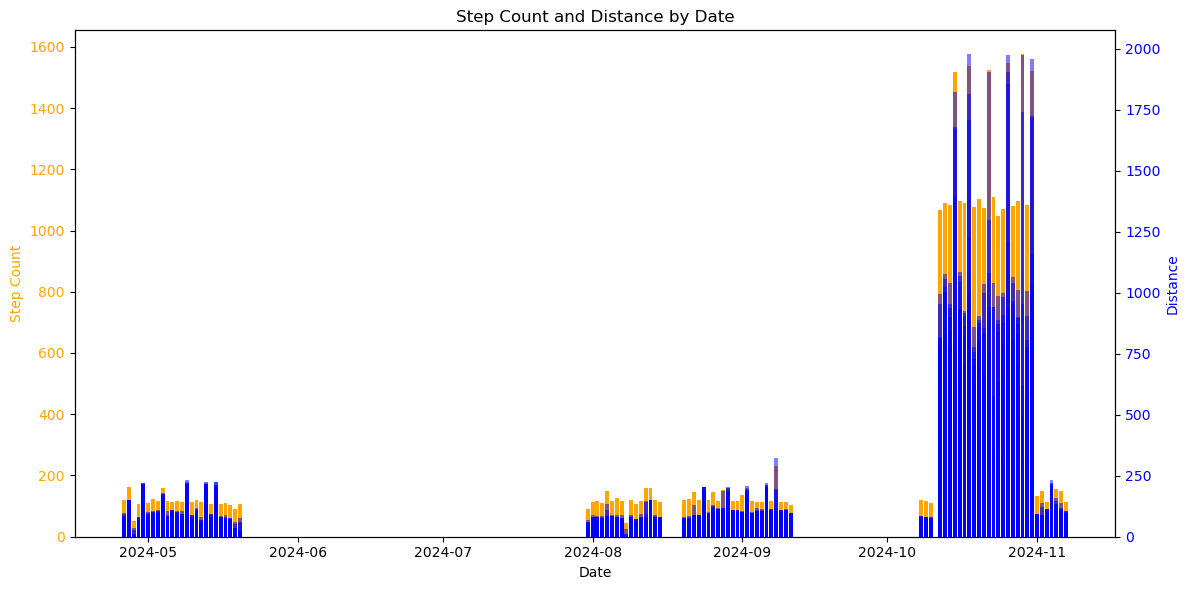

In [139]:
# Initialize Variables
x4 = step_count_df['date']
y4_count = step_count_df['count']
y4_distance = step_count_df['distance']

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))
# Plot the first bar (Step Count)
ax1.bar(x4, y4_count, color='orange', label='Step Count')
ax1.set_xlabel('Date')
ax1.set_ylabel('Step Count', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

# Create a second y-axis for the Distance bar
ax2 = ax1.twinx()
ax2.bar(x4, y4_distance, color='blue', label='Distance', alpha=0.5)
ax2.set_ylabel('Distance', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Step Count and Distance by Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


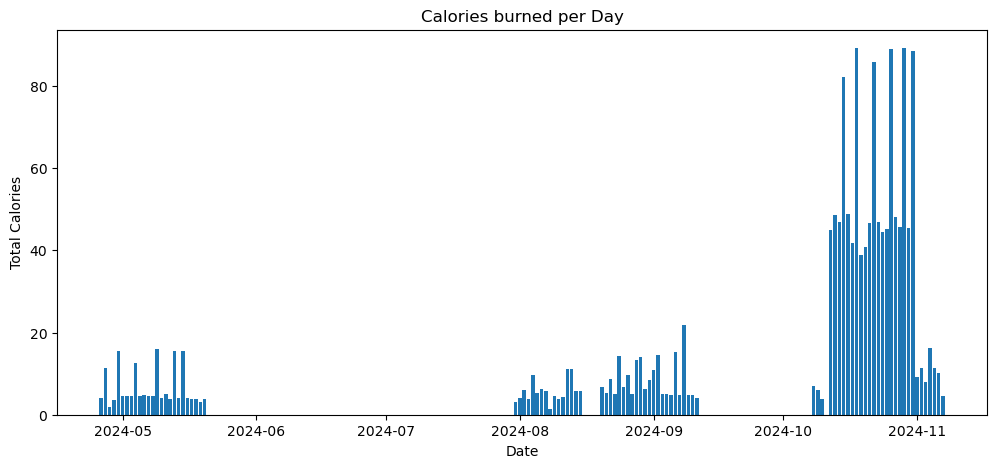

In [142]:
# Initialize Variable
y4_calorie = step_count_df['calorie']

# Create the Bar Graph
plt.figure(figsize=(12,5))
plt.bar(x4, y4_calorie)
plt.title("Calories burned per Day")
plt.xlabel('Date')
plt.ylabel('Total Calories')
plt.show()